In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import scipy

In [65]:
dc_re = pd.read_csv('/Users/justinsmith/Documents/GitHub/DC_Properties.csv')

/Users/justinsmith/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [66]:
dc_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
Unnamed: 0            158957 non-null int64
BATHRM                158957 non-null int64
HF_BATHRM             158957 non-null int64
HEAT                  158957 non-null object
AC                    158957 non-null object
NUM_UNITS             106696 non-null float64
ROOMS                 158957 non-null int64
BEDRM                 158957 non-null int64
AYB                   158686 non-null float64
YR_RMDL               80928 non-null float64
EYB                   158957 non-null int64
STORIES               106652 non-null float64
SALEDATE              132187 non-null object
PRICE                 98216 non-null float64
QUALIFIED             158957 non-null object
SALE_NUM              158957 non-null int64
GBA                   106696 non-null float64
BLDG_NUM              158957 non-null int64
STYLE                 106696 non-null object
STRUCT                106696 non-null 

In [67]:
tract_df = pd.read_csv('/Users/justinsmith/Documents/GitHub/raw_census_tracts_in_2010.csv')

In [68]:
dc_re.dropna(subset=['PRICE'], inplace=True)

In [69]:
dc_re = dc_re.drop(columns=['STATE', 'CITY'])

In [71]:
dc_re_resid = dc_re[dc_re['SOURCE'] == 'Residential']

In [72]:
dc_re_condo = dc_re[dc_re['SOURCE'] != 'Residential']

In [75]:
dc_1900 = dc_re[(dc_re['EYB'] == 1900) & (dc_re['AYB'] >= 1900)]

In [76]:
dc_re['diff_yr'] = abs(dc_re['EYB']-dc_re['YR_RMDL'])

In [77]:
dc_1900.shape

(1594, 48)

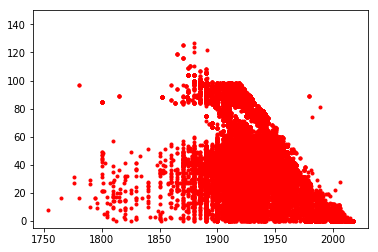

In [78]:
plt.plot(dc_re_drop['AYB'], dc_re_drop['diff_yr'], 'r.')
plt.ylim(ymax=150, ymin=-5)
plt.show()

In [94]:
for i in range(len(dc_1900)):
    if dc_1900.iloc[i,8] > dc_1900.iloc[i,10]:
        dc_1900.iloc[i,10] = dc_1900.iloc[i,8]

In [98]:
dc_1900.shape

(1594, 48)

In [123]:
dc_re_resid['diff_yr'] = abs(dc_re_resid['EYB']- dc_re_resid['YR_RMDL'])
dc_re_condo['diff_yr'] = abs(dc_re_condo['EYB']- dc_re_condo['YR_RMDL'])
# dc_re_resid = dc_re_resid.drop(index=56600)

/Users/justinsmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


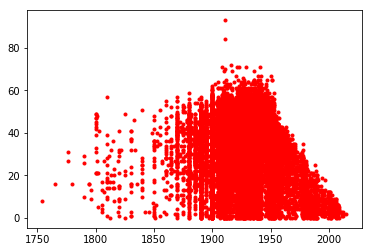

In [124]:
plt.plot(dc_re_resid['AYB'], dc_re_resid['diff_yr'], 'r.')

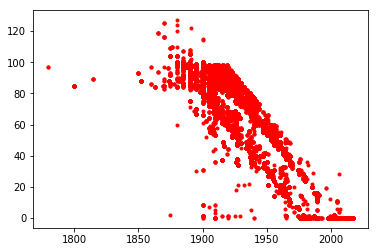

In [144]:
plt.plot(dc_re_condo['AYB'], dc_re_condo['diff_yr'], 'r.')

In [160]:
dc_re_condo[(dc_re_condo['AYB'] >1890) & (dc_re_condo['AYB'] < 1915) & (dc_re_condo['diff_yr'] > 100)].iloc[:,[8,9,10,47]]

,AYB,YR_RMDL,EYB,diff_yr
113755,1891.0,2013.0,1891.0,122.0
120315,1891.0,1993.0,1891.0,102.0
125974,1900.0,2015.0,1900.0,115.0
131883,1900.0,2014.0,1900.0,114.0


In [126]:
for i in range(len(dc_re_condo)):
    if dc_re_condo.iloc[i,8] > dc_re_condo.iloc[i,10]:
        dc_re_condo.iloc[i,10] = dc_re_condo.iloc[i,8]

In [166]:
for i in range(len(dc_re_condo)):
    if dc_re_condo.iloc[i,10] > dc_re_condo.iloc[i,9]:
        dc_re_condo.iloc[i,9] = dc_re_condo.iloc[i,10]

In [170]:
dc_re_condo[(dc_re_condo['AYB'] >1995) & (dc_re_condo['AYB'] < 2005) 
            & (dc_re_condo['diff_yr'] > 10)].iloc[:,[8,9,10,47]]

,AYB,YR_RMDL,EYB,diff_yr
133710,1999.0,2011.0,1999.0,12.0
137305,1996.0,2015.0,1996.0,19.0
137306,1996.0,2015.0,1996.0,19.0


In [136]:
# dc_re_condo.drop(129108, inplace=True)

In [174]:
for i in range(len(dc_re_resid)):
    if dc_re_resid.iloc[i,10] > dc_re_resid.iloc[i,9]:
        dc_re_resid.iloc[i,9] = dc_re_resid.iloc[i,10]

In [190]:
dc_re_resid['YR_RMDL'] = dc_re_resid['YR_RMDL'].fillna(0)

In [191]:
for i in range(len(dc_re_resid)):
    if dc_re_resid.iloc[i,9]  == 0:
        dc_re_resid.iloc[i,9] = dc_re_resid.iloc[i,10]

In [201]:
dc_re_resid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57899 entries, 0 to 106695
Data columns (total 48 columns):
Unnamed: 0            57899 non-null int64
BATHRM                57899 non-null int64
HF_BATHRM             57899 non-null int64
HEAT                  57899 non-null object
AC                    57899 non-null object
NUM_UNITS             57899 non-null float64
ROOMS                 57899 non-null int64
BEDRM                 57899 non-null int64
AYB                   57804 non-null float64
YR_RMDL               57899 non-null float64
EYB                   57899 non-null int64
STORIES               57866 non-null float64
SALEDATE              57898 non-null object
PRICE                 57899 non-null float64
QUALIFIED             57899 non-null object
SALE_NUM              57899 non-null int64
GBA                   57899 non-null float64
BLDG_NUM              57899 non-null int64
STYLE                 57899 non-null object
STRUCT                57899 non-null object
GRADE       

In [204]:
dc_re_condo['YR_RMDL'] = dc_re_condo['YR_RMDL'].fillna(0)

/Users/justinsmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [205]:
dc_re_condo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40315 entries, 106696 to 158955
Data columns (total 48 columns):
Unnamed: 0            40315 non-null int64
BATHRM                40315 non-null int64
HF_BATHRM             40315 non-null int64
HEAT                  40315 non-null object
AC                    40315 non-null object
NUM_UNITS             0 non-null float64
ROOMS                 40315 non-null int64
BEDRM                 40315 non-null int64
AYB                   40298 non-null float64
YR_RMDL               40315 non-null float64
EYB                   40315 non-null float64
STORIES               0 non-null float64
SALEDATE              40315 non-null object
PRICE                 40315 non-null float64
QUALIFIED             40315 non-null object
SALE_NUM              40315 non-null int64
GBA                   0 non-null float64
BLDG_NUM              40315 non-null int64
STYLE                 0 non-null object
STRUCT                0 non-null object
GRADE                 0 n

In [206]:
for i in range(len(dc_re_condo)):
    if dc_re_condo.iloc[i,9] == 0:
        dc_re_condo.iloc[i,9] = dc_re_condo.iloc[i,10]

/Users/justinsmith/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [208]:
dc_re_condo[dc_re_condo['YR_RMDL'] == 0]

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,diff_yr


In [221]:
dc_re_condo['AYB'] = dc_re_condo['AYB'].fillna(0)

/Users/justinsmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [222]:
for i in range(len(dc_re_condo)):
    if dc_re_condo.iloc[i,8] == 0:
        dc_re_condo.iloc[i,8] = dc_re_condo.iloc[i,10]

/Users/justinsmith/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [241]:
dc_re_condo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40315 entries, 106696 to 158955
Data columns (total 32 columns):
Unnamed: 0           40315 non-null int64
BATHRM               40315 non-null int64
HF_BATHRM            40315 non-null int64
HEAT                 40315 non-null object
AC                   40315 non-null object
ROOMS                40315 non-null int64
BEDRM                40315 non-null int64
AYB                  40315 non-null float64
YR_RMDL              40315 non-null float64
EYB                  40315 non-null float64
SALEDATE             40315 non-null object
PRICE                40315 non-null float64
QUALIFIED            40315 non-null object
SALE_NUM             40315 non-null int64
BLDG_NUM             40315 non-null int64
FIREPLACES           40315 non-null int64
USECODE              40315 non-null int64
LANDAREA             40315 non-null int64
GIS_LAST_MOD_DTTM    40315 non-null object
SOURCE               40315 non-null object
CMPLX_NUM            40315 non-

In [231]:
dc_re_condo.drop(columns='ASSESSMENT_SUBNBHD', inplace=True)

/Users/justinsmith/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [232]:
dc_re_resid.drop(columns='ASSESSMENT_SUBNBHD', inplace=True)

In [233]:
dc_re_resid.drop(columns='FULLADDRESS', inplace=True)

In [235]:
dc_re_condo.dropna(axis=1, how='all', inplace=True)

/Users/justinsmith/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [237]:
dc_re_condo.drop(columns='diff_yr', inplace=True)

/Users/justinsmith/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [245]:
dc_re_resid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57899 entries, 0 to 106695
Data columns (total 42 columns):
Unnamed: 0           57899 non-null int64
BATHRM               57899 non-null int64
HF_BATHRM            57899 non-null int64
HEAT                 57899 non-null object
AC                   57899 non-null object
NUM_UNITS            57899 non-null float64
ROOMS                57899 non-null int64
BEDRM                57899 non-null int64
AYB                  57804 non-null float64
YR_RMDL              57899 non-null float64
EYB                  57899 non-null int64
STORIES              57866 non-null float64
SALEDATE             57898 non-null object
PRICE                57899 non-null float64
QUALIFIED            57899 non-null object
SALE_NUM             57899 non-null int64
GBA                  57899 non-null float64
BLDG_NUM             57899 non-null int64
STYLE                57899 non-null object
STRUCT               57899 non-null object
GRADE                57899 non-n

In [239]:
dc_re_resid.dropna(axis=1, how='all', inplace=True)

In [243]:
dc_re_resid.drop(columns='CENSUS_BLOCK',inplace=True)

In [244]:
dc_re_resid.drop(columns='diff_yr',inplace=True)

In [248]:
dc_re_resid.drop(columns='NATIONALGRID',inplace=True)

In [283]:
dc_re_resid.nunique()

Unnamed: 0           57763
BATHRM                  13
HF_BATHRM                8
HEAT                    14
AC                       3
NUM_UNITS                7
ROOMS                   30
BEDRM                   17
AYB                    200
YR_RMDL                 80
EYB                     83
STORIES                 30
SALEDATE              6438
PRICE                 9284
QUALIFIED                2
SALE_NUM                15
GBA                   4015
BLDG_NUM                 2
STYLE                   18
STRUCT                   8
GRADE                   13
CNDTN                    7
EXTWALL                 24
ROOF                    16
INTWALL                 12
KITCHENS                 8
FIREPLACES              14
USECODE                  8
LANDAREA              8515
GIS_LAST_MOD_DTTM        1
SOURCE                   1
ZIPCODE                 21
LATITUDE             57102
LONGITUDE            57275
ASSESSMENT_NBHD         55
CENSUS_TRACT           171
WARD                     8
S

In [259]:
dc_re_resid['AYB'] = dc_re_resid['AYB'].fillna(0)

In [260]:
for i in range(len(dc_re_resid)):
    if dc_re_resid.iloc[i,8] == 0:
        dc_re_resid.iloc[i,8] = dc_re_resid.iloc[i,10]

In [264]:
dc_re_resid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57763 entries, 0 to 106695
Data columns (total 41 columns):
Unnamed: 0           57763 non-null int64
BATHRM               57763 non-null int64
HF_BATHRM            57763 non-null int64
HEAT                 57763 non-null object
AC                   57763 non-null object
NUM_UNITS            57763 non-null float64
ROOMS                57763 non-null int64
BEDRM                57763 non-null int64
AYB                  57763 non-null float64
YR_RMDL              57763 non-null float64
EYB                  57763 non-null int64
STORIES              57763 non-null float64
SALEDATE             57763 non-null object
PRICE                57763 non-null float64
QUALIFIED            57763 non-null object
SALE_NUM             57763 non-null int64
GBA                  57763 non-null float64
BLDG_NUM             57763 non-null int64
STYLE                57763 non-null object
STRUCT               57763 non-null object
GRADE                57763 non-n

In [263]:
dc_re_resid.dropna(inplace=True)

In [ ]:
dc_re_resid.drop(columns=['X','Y','GIS_LAST_MOD_DTTM','SOURCE'] )

In [282]:
dc_re_resid.iloc[:,[32,33,37,38,39]]

,LATITUDE,LONGITUDE,SQUARE,X,Y
0,38.914680,-77.040832,152,-77.040429,38.914881
2,38.914684,-77.040678,152,-77.040429,38.914881
3,38.914683,-77.040629,152,-77.040429,38.914881
5,38.914331,-77.039715,152,-77.040429,38.914881
7,38.915408,-77.040129,152,-77.040429,38.914881
8,38.915017,-77.039903,152,-77.040429,38.914881
14,38.915038,-77.039716,152,-77.040429,38.914881
16,38.915018,-77.039844,152,-77.040429,38.914881
19,38.915019,-77.040138,152,-77.040429,38.914881
20,38.911370,-77.033774,208,-77.033366,38.911716


In [265]:
from sklearn.decomposition import PCA 

In [267]:
target_res = dc_re_resid['PRICE']
X_res = dc_re_resid.drop(columns='PRICE')
pca = PCA(n_components=10)

In [268]:
dc_res_pca = pca.fit(X_res)

ValueError: could not convert string to float: 'SW'